In [1]:
import matplotlib.pyplot as plt
import numpy as np


# Bulk Free Energy Density   
c can either be c or \$ \phi \$
\begin{equation}
f_{bulk} = f_0 c^{2} (1-c)^{2}
\end{equation}

In [2]:
def calc_f_bulk(c : float, c1 = 0, c2 =1, f_0=1.) -> float:
    return f_0 * (c1 - c)**2 *(c2-c)**2

# Generic two well potential

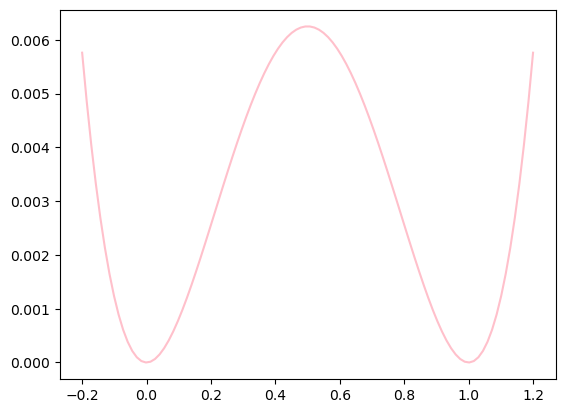

In [3]:
c = np.linspace(-0.2,1.2,100)
f_bulk = [calc_f_bulk(c_i, f_0=0.1) for c_i in c]
fig, ax = plt.subplots()
ax.plot(c, f_bulk, 'pink')

In [ ]:
c = np.linspace(-0.2,1.2,100)
c1 = 0.16